In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

dt1 = pd.read_csv('RawData1.csv', low_memory=False)
dt2 = pd.read_csv('RawData2.csv')
dt3 = pd.read_csv('RawData3.csv')
dt4 = pd.read_csv('RawData4.csv')
dt5 = pd.read_csv('RawData5.csv')
dt6 = pd.read_csv('RawData6.csv')
dt7 = pd.read_csv('RawData7.csv')

In [137]:
dt1.Detected_State.unique()

array(['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa',
       'Andaman and Nicobar Islands', 'Jharkhand', 'Assam',
       'Arunachal Pradesh', nan, 'Tripura', 'Meghalaya'], dtype=object)

In [109]:
d = dt1.loc[dt1.Detected_State == 'Tamil Nadu', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_cases', 'Current_Status']]
d1 = dt2.loc[dt2.Detected_State == 'Tamil Nadu', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_cases', 'Current_Status']]
d2 = dt3.loc[dt3.Detected_State == 'Tamil Nadu', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_cases', 'Current_Status']]
d3 = dt4.loc[dt4.Detected_State == 'Tamil Nadu', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_cases', 'Current_Status']]
d4 = dt5.loc[dt5.Detected_State == 'Tamil Nadu', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_cases', 'Current_Status']]
d5 = dt6.loc[dt6.Detected_State == 'Tamil Nadu', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_cases', 'Current_Status']]
d6 = dt7.loc[dt7.Detected_State == 'Tamil Nadu', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_cases', 'Current_Status']]


In [110]:
dd = pd.concat([d,d1,d2,d3,d4,d5])
data = pd.concat([dd, d6])

In [111]:
data.Detected_District.unique()

array(['Kancheepuram', 'Chennai', 'Erode', 'Coimbatore', 'Tirunelveli',
       'Tiruppur', 'Madurai', 'Chengalpattu', 'Salem', 'Ranipet',
       'Thanjavur', 'Vellore', 'Virudhunagar', 'Karur', 'Tiruvannamalai',
       'Viluppuram', 'Namakkal', 'Kanyakumari', 'Thoothukkudi', 'Theni',
       'Dindigul', 'Sivaganga', 'Tirupathur', 'Thiruvarur',
       'Ramanathapuram', 'Thiruvallur', 'Nagapattinam', 'Cuddalore',
       'Kallakurichi', 'Perambalur', 'Tiruchirappalli', 'Nilgiris',
       'Ariyalur', 'Tenkasi', 'Pudukkottai', 'Dharmapuri', nan,
       'Krishnagiri', 'Airport Quarantine', 'Railway Quarantine',
       'Other State', 'TENKASI', 'chennai', 'CHENNAI',
       'Airport quarantine', 'KARUR', 'chengalpattu', 'MADURAI'],
      dtype=object)

In [112]:
data.update(data.Detected_District.replace(to_replace =["chennai", "CHENNAI"], value ="Chennai")) 
data.update(data.Detected_District.replace(to_replace =["Other State", "Railway Quarantine", "Airport Quarantine", "Airport quarantine"], value ="Unknown State")) 
data.update(data.Detected_District.replace(to_replace =["Krishnagiri", "Dharmapuri", "Salem", "Namakkal", "Karur", "KARUR", "Dindigul", "Tiruppur", "Coimbatore", "Nilgiris", "Erode"], value ="Kongu Nade(WestTN)")) 
data.update(data.Detected_District.replace(to_replace =["Sivaganga","Madurai", "Theni", "Virudhunagar", "TENKASI", "Tenkasi","Thoothukkudi", "Tirunelveli", "Kanyakumari","Ramanathapuram", "MADURAI"], value ="Pandy Nadu(South TN)")) 
data.update(data.Detected_District.replace(to_replace =["Viluppuram","Kallakurichi", "Cuddalore", "Perambalur", "Ariyalur", "Tiruchirappalli", "Thanjavur","Thiruvarur","Nagapattinam", "Pudukkottai"], value ="Chola Nadu(Mid TN)")) 
data.update(data.Detected_District.replace(to_replace =["Thiruvallur","Ranipet", "Vellore", "Tirupathur", "Tiruvannamalai","Chengalpattu","chengalpattu", "Kanchipuram","Kancheepuram", "Chennai"], value ="Tondaimalam(North TN)")) 


In [113]:
data.Detected_District.unique()

array(['Tondaimalam(North TN)', 'Kongu Nade(WestTN)',
       'Pandy Nadu(South TN)', 'Chola Nadu(Mid TN)', nan, 'Unknown State'],
      dtype=object)

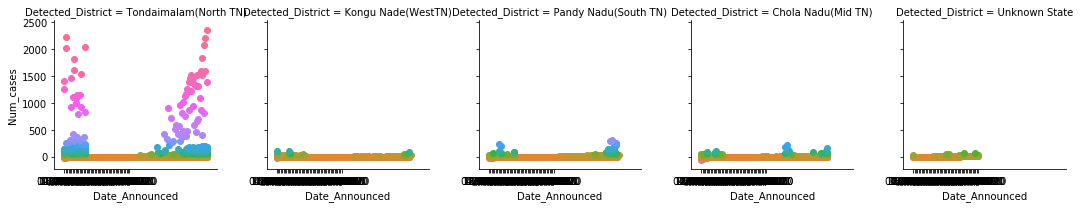

In [114]:
import seaborn as sns 
import matplotlib.pyplot as plt
#sns.set(style="ticks")
g = sns.FacetGrid(data, col="Detected_District", hue="Num_cases")
g.map(plt.scatter, "Date_Announced", "Num_cases")
#plt.xticks(rotation=90)
plt.show()

In [115]:
s= sum(data.Num_cases)
s

140398.0

In [116]:
de = data.loc[data.Current_Status == 'Deceased', ['Num_cases']]
di = data.loc[data.Current_Status == 'Discharged', ['Num_cases']]
kk = sum(di.Num_cases)
k = sum(de.Num_cases)
pop = 72147039 

In [117]:
cmr = (100*(k/pop))
ifr = ((k/s)*100)

print("Crude Mortality rate of Tamil Nadu is -",cmr)
print("Infection Fertanity Rate of Tamil Nadu is -",ifr)

Crude Mortality rate of Tamil Nadu is - 0.0016327766410482903
Infection Fertanity Rate of Tamil Nadu is - 0.8390432912149746


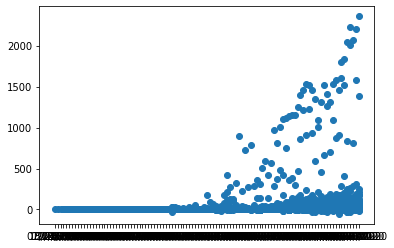

In [118]:
plt.scatter(data['Date_Announced'], data['Num_cases'])

In [131]:
N = 72147039
I0, R0 = 46108, 84153
S0 = N - (I0 + R0)
beta, gamma = 1.1, 1./12
t = np.linspace(0, 160, 160)

In [132]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [133]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

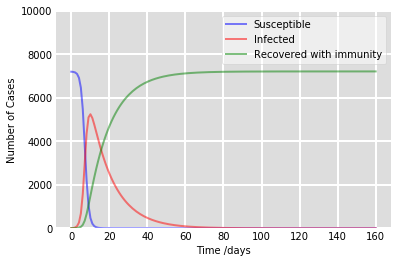

<Figure size 2880x2880 with 0 Axes>

In [136]:
fig = plt.figure(facecolor='w')
plt.figure(figsize =(40,40))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/10000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/10000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/10000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of Cases')
ax.set_ylim(0,10000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()